In [5]:
import pandas as pd

# Leer los archivos CSV
df_presupuesto = pd.read_csv('presupuesto.csv')
df_real = pd.read_csv('real.csv')

# Unir ambos DataFrames por Departamento y Mes
df_merged = pd.merge(df_presupuesto, df_real, on=['Departamento', 'Mes'])

# Calcular desviaciones
df_merged['Desviación (€)'] = df_merged['Real (€)'] - df_merged['Presupuesto (€)']
df_merged['Desviación (%)'] = (df_merged['Desviación (€)'] / df_merged['Presupuesto (€)']) * 100

# Redondear para mejor visualización
df_merged['Desviación (%)'] = df_merged['Desviación (%)'].round(2)

# Mostrar el resultado
print(df_merged)


   Departamento         Mes  Presupuesto (€)  Real (€)  Desviación (€)  \
0        Ventas       Enero            17270     13130           -4140   
1        Ventas     Febrero            15390     15581             191   
2        Ventas       Marzo            15734     16999            1265   
3        Ventas       Abril            10466      9892            -574   
4        Ventas        Mayo            15578     18900            3322   
5        Ventas       Junio            11685      7454           -4231   
6        Ventas       Julio            16949     14382           -2567   
7        Ventas      Agosto            15311     15362              51   
8        Ventas  Septiembre            16420     12604           -3816   
9        Ventas     Octubre            14555     12940           -1615   
10       Ventas   Noviembre            16396     20062            3666   
11       Ventas   Diciembre            19274     16832           -2442   
12    Marketing       Enero           

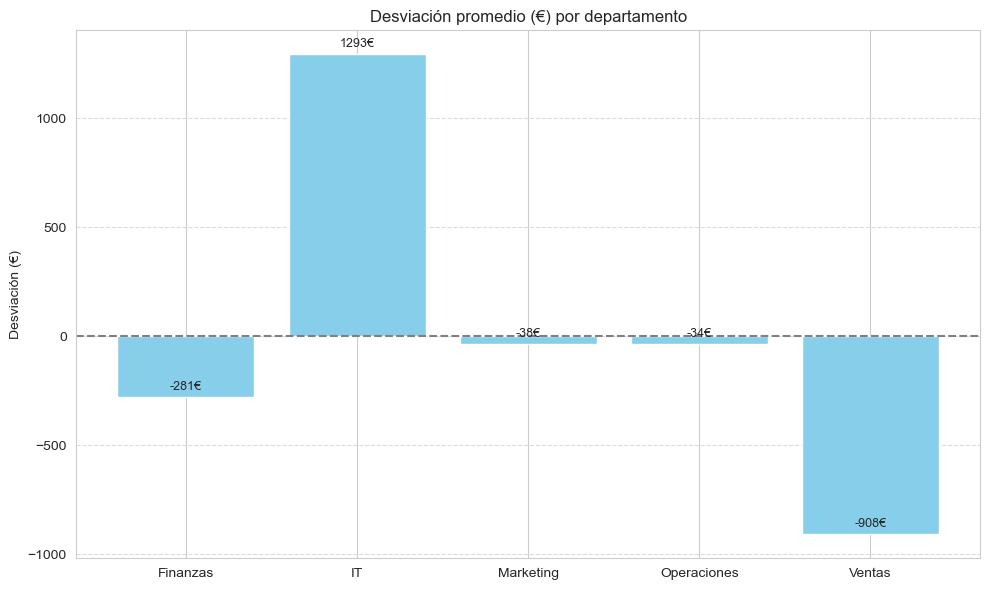

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer y unir los datos
df_presupuesto = pd.read_csv('presupuesto.csv')
df_real = pd.read_csv('real.csv')
df = pd.merge(df_presupuesto, df_real, on=['Departamento', 'Mes'])
df['Desviación (€)'] = df['Real (€)'] - df['Presupuesto (€)']
df['Desviación (%)'] = (df['Desviación (€)'] / df['Presupuesto (€)']) * 100

# Gráfico: desviación promedio por departamento
df_avg = df.groupby('Departamento')[['Desviación (€)', 'Desviación (%)']].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(df_avg['Departamento'], df_avg['Desviación (€)'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Desviación promedio (€) por departamento')
plt.ylabel('Desviación (€)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}€', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


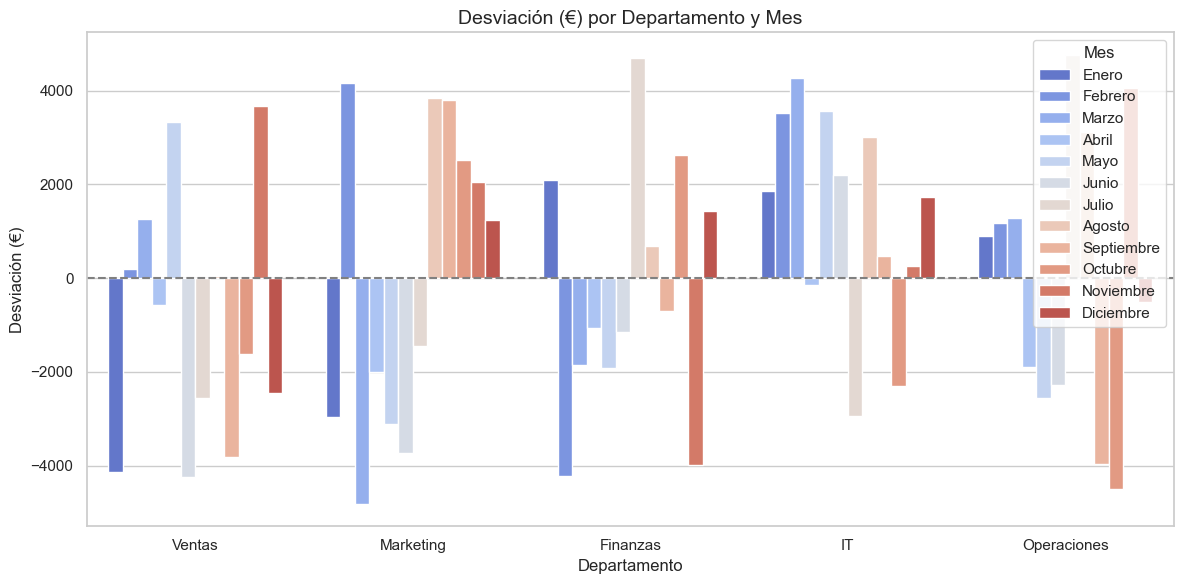

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Leer los datos
df_presupuesto = pd.read_csv('presupuesto.csv')
df_real = pd.read_csv('real.csv')

# Unir y calcular desviaciones
df = pd.merge(df_presupuesto, df_real, on=['Departamento', 'Mes'])
df['Desviación (€)'] = df['Real (€)'] - df['Presupuesto (€)']
df['Desviación (%)'] = (df['Desviación (€)'] / df['Presupuesto (€)']) * 100
df['Desviación (%)'] = df['Desviación (%)'].round(2)

# Visualización con seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de barras: desviación por departamento y mes
sns.barplot(
    data=df,
    x='Departamento',
    y='Desviación (€)',
    hue='Mes',
    palette='coolwarm'
)

plt.title('Desviación (€) por Departamento y Mes', fontsize=14)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Desviación (€)')
plt.xlabel('Departamento')
plt.legend(title='Mes')
plt.tight_layout()
plt.show()


In [15]:
# Ordenar por desviación %
tabla_ordenada = df.sort_values(by='Desviación (%)', ascending=False)
tabla_ordenada.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas
tabla_ordenada[['Departamento', 'Mes', 'Presupuesto (€)', 'Real (€)', 'Desviación (€)', 'Desviación (%)']].head(10)


,Departamento,Mes,Presupuesto (€),Real (€),Desviación (€),Desviación (%)
0,IT,Marzo,10878,15146,4268,39.24
1,Marketing,Febrero,12747,16914,4167,32.69
2,IT,Agosto,10064,13070,3006,29.87
3,Marketing,Agosto,13890,17728,3838,27.63
4,Operaciones,Julio,18154,22916,4762,26.23
5,Finanzas,Julio,17989,22681,4692,26.08
6,Marketing,Septiembre,15393,19185,3792,24.63
7,Operaciones,Noviembre,16910,20972,4062,24.02
8,Finanzas,Octubre,10995,13624,2629,23.91
9,Ventas,Noviembre,16396,20062,3666,22.36
